In [18]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    """State of the agent"""
    number1:int
    number2:int
    operation:str
    result:int

def adding_numbers(state:AgentState) -> AgentState:
    """This function adds two numbers"""
    state['result']=state['number1'] + state['number2']
    return state


def subtracting_numbers(state:AgentState)-> AgentState:
    """This function subtracts two numbers"""
    state['result']=state['number1'] - state['number2']
    return state


def decide_next_state(state:AgentState) -> str:
    """This step decided which operation is called and which tool shall be used"""
    if state['operation'] == '+':
        return "add_op"  # Return value must match mapping key
    elif state['operation'] == "-":
        return "sub_op"  # Return value must match mapping key
    else: 
        return "error"    

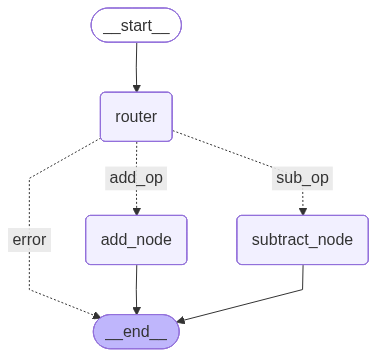

In [15]:
#Compile the graph
graph=StateGraph(AgentState)
graph.add_node("add_node",adding_numbers)
graph.add_node("subtract_node",subtracting_numbers)

# This line adds a node named 'router' to the graph, which simply passes the input state through unchanged.
def router_node(state: AgentState) -> AgentState:
    """Router node that passes state through unchanged"""
    return state

graph.add_node('router', router_node)

# Add edge from START to router
graph.add_edge(START, 'router')

# Add conditional edges from router - this routes based on decide_next_state function
graph.add_conditional_edges(
    'router',  # Source node
    decide_next_state,  # Routing function
    {
        'add_op': 'add_node',  # Maps return value "add_op" to node "add_node"
        'sub_op': 'subtract_node',  # Maps return value "sub_op" to node "subtract_node"
        'error': END  # Handle error case by going directly to END
    }
)

# Add edges from operation nodes to END
graph.add_edge('add_node', END)
graph.add_edge('subtract_node', END)

bot=graph.compile()
bot




In [17]:
input_state={
    "number1":100,
    "number2":200,
    "operation":"-"
}
response=bot.invoke(input_state)
print(response)




{'number1': 100, 'number2': 200, 'operation': '-', 'result': -100}
